**Clase Practica: Aprendizaje Máquina.**

Existen muchas formas de crear un árbol de decisión, la mas  sencilla es utilizar las bibliotecas y funciones de machine learning.

A continuación se muestra un ejemplo sencillo, utilizando la base de datos IRIS.

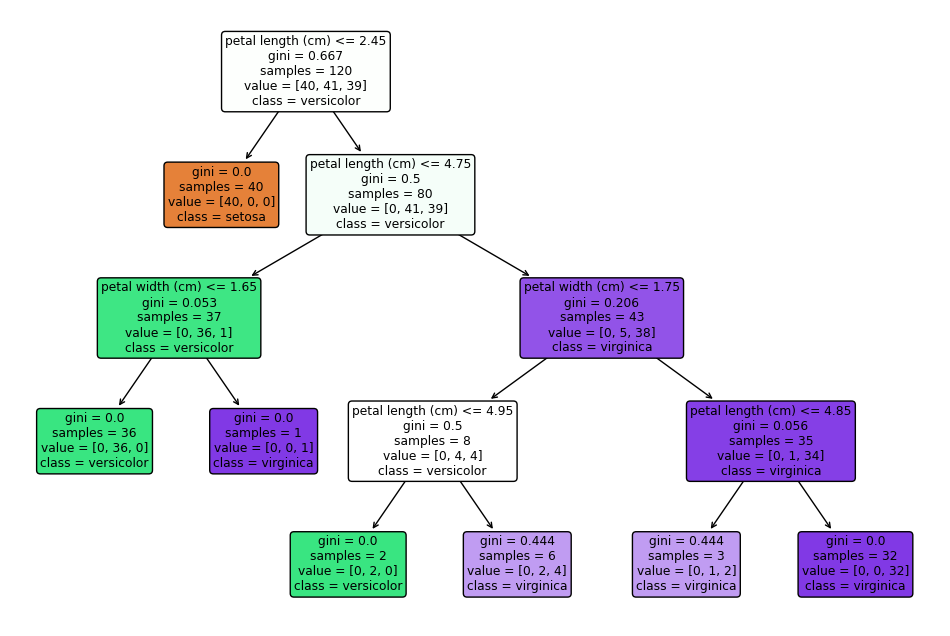

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Cargar el conjunto de datos Iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construir el árbol de decisión con scikit-learn para aprovechar tree.plot_tree
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)

# Visualizar el árbol utilizando tree.plot_tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.show()


Como se puede observar, la implementación es sencilla, como actividad se debe utilizar este código y realizar la clasificación con un conjunto diferente de datos de su elección.

**Reporte el contexto de los resultados, los datos utilizados así como las clases existentes en su dataset.**


--------------------------------------------------------------------------------

---



## **Algoritmo CART (Classification and Regression Trees):**
*   Este algoritmo es una variante común de los árboles de decisión.
*   Para problemas de clasificación, utiliza la entropía o la impureza de Gini, similar al enfoque clásico.

Para problemas de regresión, en lugar de medir la impureza, utiliza el error cuadrático medio (MSE) o el error absoluto medio (MAE) para evaluar la calidad de las divisiones.


A continuación se presenta un ejercicio que realiza la implementación del algoritmo de árbol de regresión calculando los nodos intermedios y hoja mediante el cálculo de la entropía y la impureza de Gini.


**ACTIVIDAD**
Realizar la descripción de los instrucciones realizadas así como de los resultados obtenidos.

In [ ]:
class DecisionNode:
    def __init__(self, feature=None, threshold=None, value=None, left=None, right=None):
        self.feature = feature  # Índice de la característica para dividir
        self.threshold = threshold  # Umbral de división
        self.value = value  # Valor de predicción si es un nodo hoja
        self.left = left  # Subárbol izquierdo
        self.right = right  # Subárbol derecho

def predict(node, sample):
    if node.value is not None:
        return node.value  # Nodo hoja, devuelve el valor de predicción

    if sample[node.feature] <= node.threshold:
        return predict(node.left, sample)
    else:
        return predict(node.right, sample)

def build_tree(X, y):
    if len(set(y)) == 1:
        # Todos los ejemplos pertenecen a la misma clase, crear un nodo hoja
        return DecisionNode(value=y[0])

    num_features = len(X[0])
    best_feature, best_threshold = None, None
    best_gini = float('inf')

    for feature in range(num_features):
        thresholds = set(X[i][feature] for i in range(len(X)))
        for threshold in thresholds:
            left_indices = [i for i in range(len(X)) if X[i][feature] <= threshold]
            right_indices = [i for i in range(len(X)) if X[i][feature] > threshold]

            left_gini = gini_impurity([y[i] for i in left_indices])
            right_gini = gini_impurity([y[i] for i in right_indices])

            weighted_gini = (len(left_indices) * left_gini + len(right_indices) * right_gini) / len(X)

            if weighted_gini < best_gini:
                best_gini = weighted_gini
                best_feature = feature
                best_threshold = threshold

    if best_gini == float('inf'):
        # No se encontró ninguna división que mejore la pureza
        return DecisionNode(value=y[0])

    left_indices = [i for i in range(len(X)) if X[i][best_feature] <= best_threshold]
    right_indices = [i for i in range(len(X)) if X[i][best_feature] > best_threshold]

    left_subtree = build_tree([X[i] for i in left_indices], [y[i] for i in left_indices])
    right_subtree = build_tree([X[i] for i in right_indices], [y[i] for i in right_indices])

    return DecisionNode(feature=best_feature, threshold=best_threshold, left=left_subtree, right=right_subtree)

def gini_impurity(labels):
    if len(labels) == 0:
        return 0

    p_true = sum(label == 1 for label in labels) / len(labels)
    p_false = 1 - p_true

    return 1 - (p_true**2 + p_false**2)

# Conjunto de datos de ejemplo
X = [[0, 0], [1, 1], [1, 0], [0, 1]]
y = [0, 1, 1, 0]

# Construir el árbol de decisión
tree_root = build_tree(X, y)

# Ejemplo de predicción
sample = [0, 1]
prediction = predict(tree_root, sample)
print(f'Para la muestra {sample}, la predicción es: {prediction}')


Para la muestra [0, 1], la predicción es: 0


Como se puede observar, no se presentan los resultados de forma gráfica. Y además el ejemplo implica un conjunto de datos binarios por lo que se puede revisar el procedimiento paso a paso.


A continuación se presenta la forma de obtener una representación de las relaciónes en un grafo. Dicho grafo se generá en un archivo de imagen.

In [ ]:
import graphviz

def visualize_tree(node, feature_names, class_names, dot=None):
    if dot is None:
        dot = graphviz.Digraph(comment='Decision Tree')

    if node.value is not None:
        dot.node(str(node.value), label=str(node.value), shape='box')
    else:
        dot.node(str(node.feature), label=f"{feature_names[node.feature]} <= {node.threshold:.2f}")

        left_label = "True" if node.left.value is not None else f"{feature_names[node.left.feature]} <= {node.left.threshold:.2f}"
        right_label = "True" if node.right.value is not None else f"{feature_names[node.right.feature]} <= {node.right.threshold:.2f}"

        dot.node(str(node.left.feature), label=left_label)
        dot.node(str(node.right.feature), label=right_label)

        dot.edge(str(node.feature), str(node.left.feature), label='True')
        dot.edge(str(node.feature), str(node.right.feature), label='False')

        visualize_tree(node.left, feature_names, class_names, dot)
        visualize_tree(node.right, feature_names, class_names, dot)

    return dot

# Crear un árbol de decisión
tree_root = build_tree(X, y)

# Obtener nombres de características y clases
feature_names = [f'Feature {i+1}' for i in range(len(X[0]))]
class_names = ['False', 'True']

# Visualizar el árbol
dot = visualize_tree(tree_root, feature_names, class_names)
dot.render('decision_tree', format='png', cleanup=True)


'decision_tree.png'

--------------------------------------------------------------

---



## **Árboles de Decisión Clasificatorios:**
*   En el enfoque clásico, se utiliza el cálculo de la entropía o la impureza de Gini para tomar decisiones sobre cómo dividir los datos en los nodos del árbol.
*   El objetivo es maximizar la pureza de los nodos, de modo que las instancias de una misma clase estén agrupadas.


Como en el caso del ejemplo anterior, se requiere implementar el árbol de decisión mediante el procesamiento de la entropía y la impureza de Gini.


A continuación se plesenta el procedimiento realizado.

Describir y compartir las observaciones realizadas.


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

# Cargar el conjunto de datos Iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir la clase Node para construir el árbol
class Node:
    def __init__(self, feature=None, threshold=None, value=None, left=None, right=None):
        self.feature = feature
        self.threshold = threshold
        self.value = value
        self.left = left
        self.right = right

# Función para calcular la entropía
def entropy(y):
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -np.sum(probabilities * np.log2(probabilities + 1e-10))

# Función para dividir el conjunto de datos
def split(X, y, feature, threshold):
    left_mask = X[:, feature] <= threshold
    right_mask = ~left_mask
    return X[left_mask], y[left_mask], X[right_mask], y[right_mask]

# Función para encontrar la mejor división
def find_best_split(X, y):
    m, n = X.shape
    if m <= 1:
        return None, None

    parent_entropy = entropy(y)
    best_gain = 0
    best_feature = None
    best_threshold = None

    for feature in range(n):
        thresholds = np.unique(X[:, feature])
        for threshold in thresholds:
            X_left, y_left, X_right, y_right = split(X, y, feature, threshold)

            if len(y_left) == 0 or len(y_right) == 0:
                continue

            left_weight = len(y_left) / m
            right_weight = len(y_right) / m
            gain = parent_entropy - (left_weight * entropy(y_left) + right_weight * entropy(y_right))

            if gain > best_gain:
                best_gain = gain
                best_feature = feature
                best_threshold = threshold

    return best_feature, best_threshold

# Función para construir el árbol recursivamente
def build_tree(X, y, depth=0, max_depth=None):
    if depth == max_depth or len(set(y)) == 1:
        # Nodo hoja
        return Node(value=np.argmax(np.bincount(y)))

    feature, threshold = find_best_split(X, y)

    if feature is None:
        # No se puede dividir más
        return Node(value=np.argmax(np.bincount(y)))

    X_left, y_left, X_right, y_right = split(X, y, feature, threshold)

    left_subtree = build_tree(X_left, y_left, depth + 1, max_depth)
    right_subtree = build_tree(X_right, y_right, depth + 1, max_depth)

    return Node(feature=feature, threshold=threshold, left=left_subtree, right=right_subtree)

# Construir el árbol de decisión
max_depth = 3
decision_tree = build_tree(X_train, y_train, max_depth=max_depth)

# Visualizar el árbol
dot = visualize_tree(decision_tree, iris.feature_names, iris.target_names)
dot.render('decision_tree_iris', format='png', cleanup=True)


'decision_tree_iris.png'

En los resultados de los gráficos obtenidos, realice la interpretación de los mismos.

--------------------------------------------------------------
---



Como último ejercicio se presenta el ejercicio base que se encuentra en la documentación de Scikit learn

[Text(0.5, 0.75, 'Feature 1 <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]\nclass = False'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = False'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = True')]

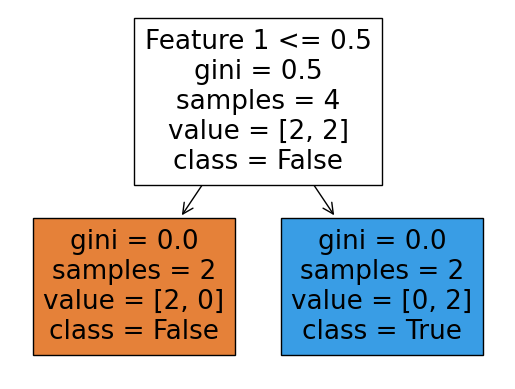

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Conjunto de datos de ejemplo
X = [[0, 0], [1, 1], [1, 0], [0, 1]]
y = [0, 1, 1, 0]  # Clases correspondientes: 0 para 'False', 1 para 'True'

# Crear un clasificador de árbol de decisión
clf = DecisionTreeClassifier()

# Entrenar el clasificador
clf = clf.fit(X, y)

# Visualizar el árbol de clasificación (puede requerir la instalación de graphviz)
tree.plot_tree(clf, feature_names=['Feature 1', 'Feature 2'], class_names=['False', 'True'], filled=True)


**Como se mencionó anteriormente implemente los códigos de árbol de regresión para un conjunto de datos de su interés y reporte sus resultados en un reporte.**

--------------------------------------------------------------
---



## **Árboles de Regresión:**


*   En lugar de predecir clases, se utilizan para predecir valores numéricos.
*   En este caso, los nodos se dividen de manera que se minimice el error de predicción en cada nodo, utilizando medidas como el MSE o el MAE.




**Como actividad final implemente un árbol de regresión con base en el algortimo CART presentado en clase.**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Cargar el conjunto de datos Iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir la clase Node para construir el árbol
class Node:
    def __init__(self, feature=None, threshold=None, value=None, left=None, right=None):
        self.feature = feature
        self.threshold = threshold
        self.value = value
        self.left = left
        self.right = right

# Función para calcular el error cuadrático medio (MSE)
def mse(y):
    if len(y) == 0:
        return 0
    mean = np.mean(y)
    return np.mean((y - mean)**2)

# Función para dividir el conjunto de datos
def split(X, y, feature, threshold):
    left_mask = X[:, feature] <= threshold
    right_mask = ~left_mask
    return X[left_mask], y[left_mask], X[right_mask], y[right_mask]

# Función para encontrar la mejor división
def find_best_split(X, y):
    m, n = X.shape
    if m <= 1:
        return None, None  # No se puede dividir

    parent_mse = mse(y)
    best_reduction = 0
    best_feature = None
    best_threshold = None

    for feature in range(n):
        thresholds = np.unique(X[:, feature])
        for threshold in thresholds:
            X_left, y_left, X_right, y_right = split(X, y, feature, threshold)

            if len(y_left) == 0 or len(y_right) == 0:
                continue

            reduction = parent_mse - (len(y_left) / m * mse(y_left) + len(y_right) / m * mse(y_right))

            if reduction > best_reduction:
                best_reduction = reduction
                best_feature = feature
                best_threshold = threshold

    return best_feature, best_threshold

# Función para construir el árbol recursivamente
def build_tree(X, y, depth=0, max_depth=None):
    if depth == max_depth or len(y) == 0:
        # Nodo hoja, devuelve el valor medio de y
        return Node(value=np.mean(y))

    feature, threshold = find_best_split(X, y)

    if feature is None:
        # No se puede dividir más
        return Node(value=np.mean(y))

    X_left, y_left, X_right, y_right = split(X, y, feature, threshold)

    left_subtree = build_tree(X_left, y_left, depth + 1, max_depth)
    right_subtree = build_tree(X_right, y_right, depth + 1, max_depth)

    return Node(feature=feature, threshold=threshold, left=left_subtree, right=right_subtree)

# Función para predecir
def predict(node, sample):
    if node.value is not None:
        return node.value  # Nodo hoja, devuelve el valor medio

    if sample[node.feature] <= node.threshold:
        return predict(node.left, sample)
    else:
        return predict(node.right, sample)

# Construir el árbol de regresión
max_depth = 2
regression_tree = build_tree(X_train, y_train, max_depth=max_depth)

# Hacer predicciones en el conjunto de prueba
predictions = [predict(regression_tree, sample) for sample in X_test]

# Visualizar el árbol
dot = visualize_tree(regression_tree, iris.feature_names, iris.target_names)
dot.render('regression_tree_iris', format='png', cleanup=True)

# Calcular el error cuadrático medio en el conjunto de prueba
mse_test = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error on Test Set: {mse_test}')


Mean Squared Error on Test Set: 0.031184513559208427


Comprobado por sklearn

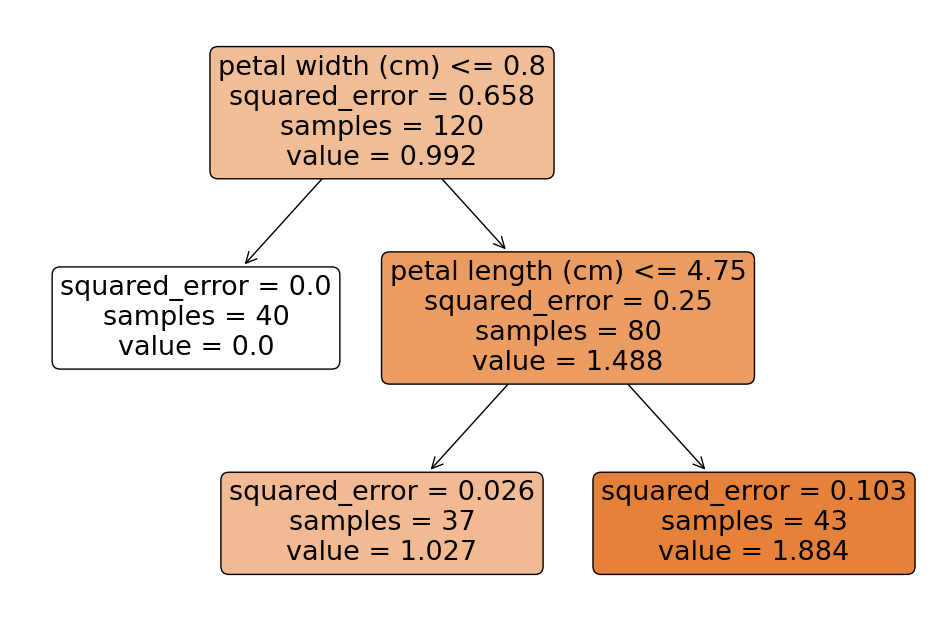

Mean Squared Error on Test Set: 0.031184513559208427


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Cargar el conjunto de datos Iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construir el árbol de regresión con scikit-learn para aprovechar tree.plot_tree
regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(X_train, y_train)

# Visualizar el árbol utilizando tree.plot_tree
plt.figure(figsize=(12, 8))
plot_tree(regressor, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.show()

# Hacer predicciones en el conjunto de prueba
predictions = regressor.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse_test = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error on Test Set: {mse_test}')
